In [3]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from geopy.distance import geodesic

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
# Load the dataset
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,trip_duration,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance,fare_per_distance,tip_percentage
0,748.0,1.0,75.00,24,6.300,105.300,0,2.75,27.272727,22.792023
1,1187.0,1.0,105.00,24,13.200,142.200,0,3.43,30.612245,16.877637
2,730.0,1.0,71.25,0,26.625,97.875,1,3.12,22.836538,0.000000
3,671.0,3.0,90.00,0,9.750,99.750,0,5.63,15.985790,0.000000
4,329.0,1.0,45.00,12,13.200,70.200,0,2.09,21.531100,17.094017


In [6]:
df.shape

(209673, 10)

In [7]:
# Display summary statistics of numerical features
print(df.describe())

       trip_duration  num_of_passengers           fare            tip  \
count  209673.000000      209673.000000  209673.000000  209673.000000   
mean     1173.181478           1.292808      99.623431      13.030824   
std      4775.653621           0.930754      85.602702      20.367764   
min         0.000000           0.000000       0.000000       0.000000   
25%       446.000000           1.000000      52.500000       0.000000   
50%       707.000000           1.000000      75.000000       9.000000   
75%      1098.000000           1.000000     116.250000      20.000000   
max     86387.000000           9.000000    4466.250000    2500.000000   

       miscellaneous_fees     total_fare  surge_applied       distance  \
count       209673.000000  209673.000000  209673.000000  209673.000000   
mean            15.136829     127.791084       0.280523       5.054431   
std             12.553436      98.797374       0.449256     125.217419   
min             -0.500000       0.000000      

In [8]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   num_of_passengers   209673 non-null  float64
 2   fare                209673 non-null  float64
 3   tip                 209673 non-null  int64  
 4   miscellaneous_fees  209673 non-null  float64
 5   total_fare          209673 non-null  float64
 6   surge_applied       209673 non-null  int64  
 7   distance            209673 non-null  float64
 8   fare_per_distance   209673 non-null  float64
 9   tip_percentage      209544 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 16.0 MB
None


In [9]:
df.columns

Index(['trip_duration', 'num_of_passengers', 'fare', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied', 'distance',
       'fare_per_distance', 'tip_percentage'],
      dtype='object')

In [10]:
df.isnull()

,trip_duration,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance,fare_per_distance,tip_percentage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209668,False,False,False,False,False,False,False,False,False,False
209669,False,False,False,False,False,False,False,False,False,False
209670,False,False,False,False,False,False,False,False,False,False
209671,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

trip_duration           0
num_of_passengers       0
fare                    0
tip                     0
miscellaneous_fees      0
total_fare              0
surge_applied           0
distance                0
fare_per_distance       0
tip_percentage        129
dtype: int64

In [12]:
# There are no Null values.

# Data Cleaning

In [13]:
# Convert 'trip_duration' from seconds to minutes
df['trip_duration'] = df['trip_duration'] / 60

In [14]:

# Verify the changes
print(df['trip_duration'])


0         12.466667
1         19.783333
2         12.166667
3         11.183333
4          5.483333
            ...    
209668    26.950000
209669     7.300000
209670     9.516667
209671     8.183333
209672    60.233333
Name: trip_duration, Length: 209673, dtype: float64


In [15]:
df['distance'].describe()

count    209673.000000
mean          5.054431
std         125.217419
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max       57283.910000
Name: distance, dtype: float64

In [16]:
df.head()

,trip_duration,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance,fare_per_distance,tip_percentage
0,12.466667,1.0,75.00,24,6.300,105.300,0,2.75,27.272727,22.792023
1,19.783333,1.0,105.00,24,13.200,142.200,0,3.43,30.612245,16.877637
2,12.166667,1.0,71.25,0,26.625,97.875,1,3.12,22.836538,0.000000
3,11.183333,3.0,90.00,0,9.750,99.750,0,5.63,15.985790,0.000000
4,5.483333,1.0,45.00,12,13.200,70.200,0,2.09,21.531100,17.094017


<Axes: >

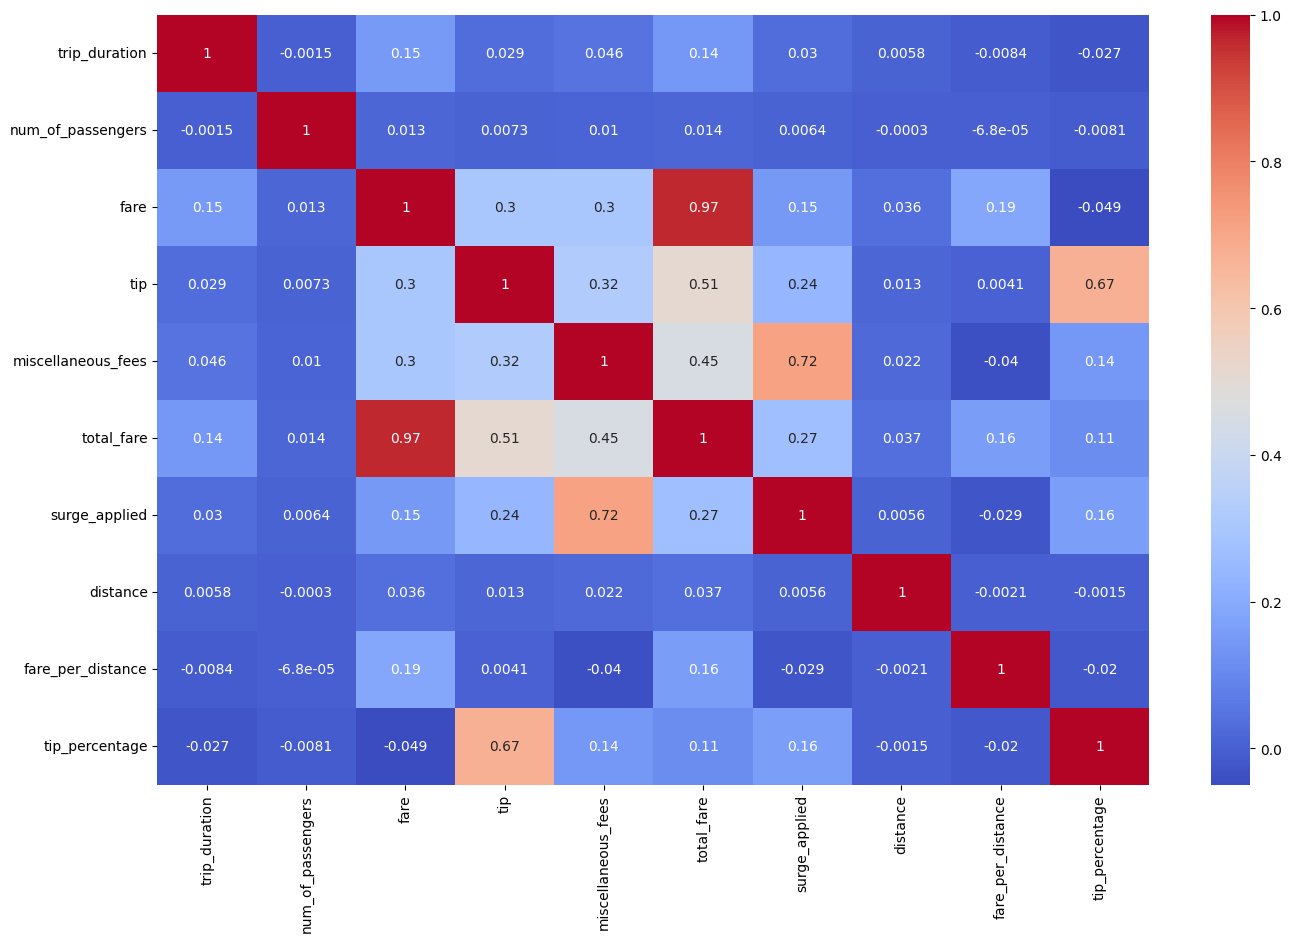

In [17]:
correlation = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

<Axes: xlabel='total_fare', ylabel='distance'>

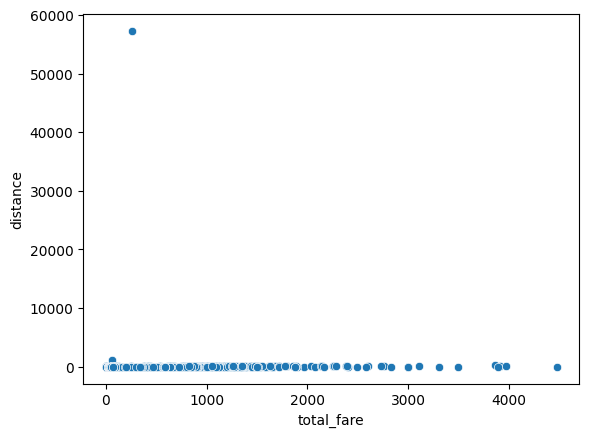

In [18]:
sns.scatterplot(data=df, x="total_fare", y="distance")

In [19]:
# There is no relationship between the total_fare &  distance_traveled.

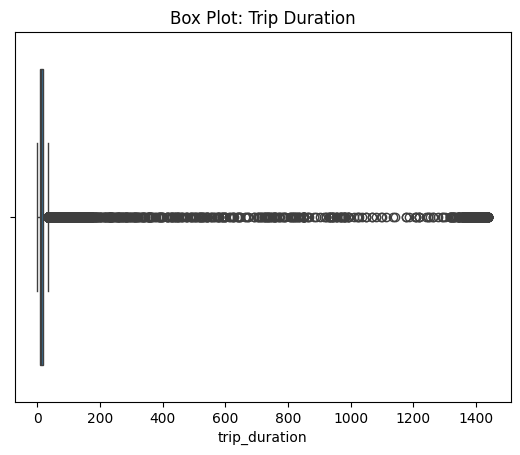

In [20]:
# Box plot for 'trip_duration'
sns.boxplot(x='trip_duration', data=df)
plt.title('Box Plot: Trip Duration')
plt.show()

In [21]:
df['trip_duration'].describe()

count    209673.000000
mean         19.553025
std          79.594227
min           0.000000
25%           7.433333
50%          11.783333
75%          18.300000
max        1439.783333
Name: trip_duration, dtype: float64

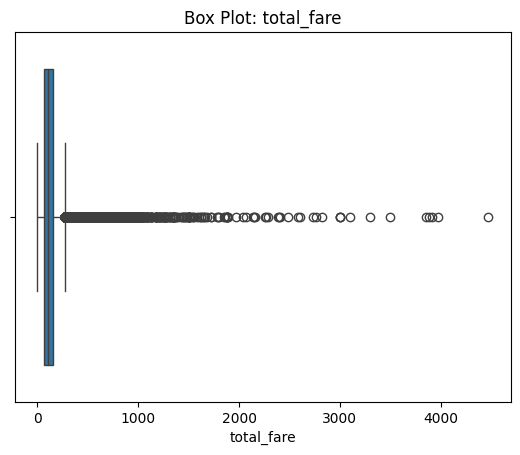

In [22]:
# Box plot for 'total_fare'
sns.boxplot(x='total_fare', data=df)
plt.title('Box Plot: total_fare')
plt.show()

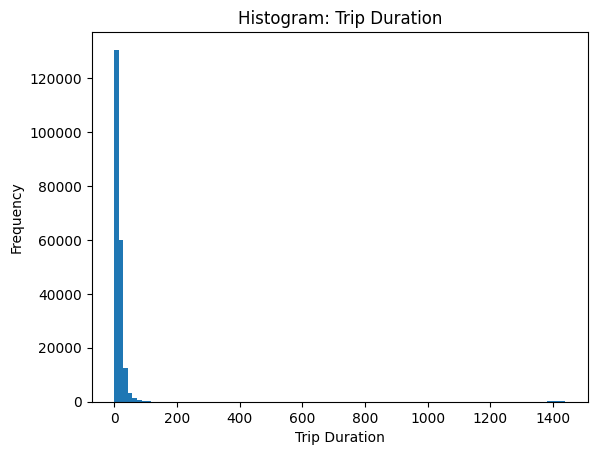

In [23]:
# Histogram for 'trip_duration'
plt.hist(df['trip_duration'], bins=100)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram: Trip Duration')
plt.show()


In [24]:
df['trip_duration'].max()

1439.7833333333333

In [25]:
df['total_fare'].mean()

127.79108397361607

In [26]:
df['total_fare'].mode().value_counts()

total_fare
58.5    1
Name: count, dtype: int64

# Multiple Linear Regression

In [27]:
# Separate independent variables (features) and dependent variable (target)
X = df[['trip_duration', 'distance', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'surge_applied']]
y = df['total_fare']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create a linear regression model
model = LinearRegression()

In [30]:
# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.486897469612444e-14
Mean Squared Error: 4.6370382907765456e-27
Root Mean Squared Error: 6.809580229923534e-14


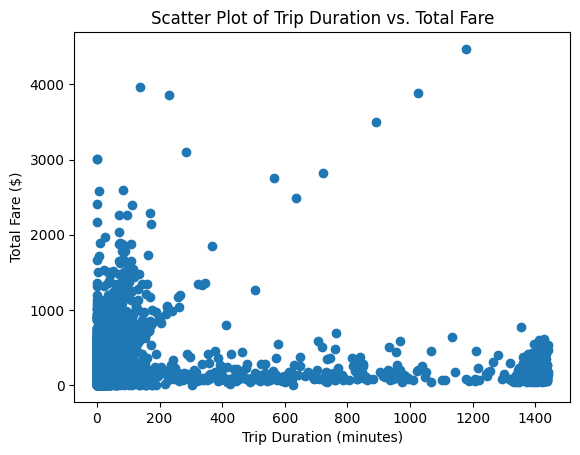

In [33]:
# Create a scatter plot of the data
plt.scatter(X_train['trip_duration'], y_train)

# Add a title and axis labels
plt.title('Scatter Plot of Trip Duration vs. Total Fare')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Total Fare ($)')

# Show the plot
plt.show()


In [34]:
mean_of_fare = df['fare'].mean()
print(mean_of_fare)

99.62343112847148


# cross validation

In [35]:
from sklearn.model_selection import cross_val_score, KFold

In [36]:
# Choose the number of folds for cross-validation (e.g., 5 )
num_folds = 5

In [37]:
# Define the cross-validation strategy (e.g., KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [38]:
# Perform cross-validation and compute mean squared error for each fold
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)


In [39]:
# Convert negative mean squared error to positive (since scikit-learn returns negated values)
mse_scores = -mse_scores

In [40]:
# Compute the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

In [41]:
# Print the results
print(f'Mean Squared Error (across {num_folds} folds): {mean_mse:.4f} +/- {std_mse:.4f}')


Mean Squared Error (across 5 folds): 0.0000 +/- 0.0000


# K-NN

In [42]:
# Create a k-nearest neighbors regressor
knn_model = KNeighborsRegressor(n_neighbors=6)  # You can adjust the number of neighbors as needed

In [43]:
# Train the model on the training set
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [44]:
# Make predictions on the testing set
y_pred_knn = knn_model.predict(X_test)

In [45]:
# Evaluate the model
print('Mean Absolute Error (KNN):', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error (KNN):', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error (KNN):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error (KNN): 0.45914003815428756
Mean Squared Error (KNN): 20.224543419130796
Root Mean Squared Error (KNN): 4.497170601515001


# Random Forest

In [46]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed


In [47]:
# Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

In [49]:
# Evaluate the model
print('Mean Absolute Error (Random Forest):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (Random Forest):', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (Random Forest):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error (Random Forest): 0.2927856206033666
Mean Squared Error (Random Forest): 45.809321247594525
Root Mean Squared Error (Random Forest): 6.768258361468963


In [50]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [51]:
import streamlit as st

In [60]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset
# Assuming you have a CSV file named 'taxi_data.csv'
data = pd.read_csv('train.csv')

# Split data into features (X) and target (y)
X = data[['trip_duration', 'distance', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'surge_applied']]
y = data['total_fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('Regression.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model re-trained and saved successfully.")


Model re-trained and saved successfully.
